Necessary packages:

In [110]:
import glob
import os
import warnings


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pydicom
from pydicom.data import get_testdata_files
from sklearn.model_selection import train_test_split

from IPython.display import Markdown, display

 # Import functions from the module
import importlib
import help_files._0_definitions 
import  help_files._1_visuals_script
# import  help_files._01_load_data
 # Reload the module to apply the changes to the script
importlib.reload(help_files._0_definitions)
importlib.reload(help_files._1_visuals_script)
# importlib.reload(help_files._01_load_data)
import  help_files._1_visuals_script  as pauls_vs

# Define the path
from pathlib import Path

 

In [111]:
### In definitions are all the functions that are used in the notebook and globals
with open("help_files/_0_definitions.py") as file:
    exec(file.read())

In [112]:
# Load the data from _01_load_data
file_names = ["X_train.csv", "X_train_coor.csv", "X_train_des.csv"]
dataframes = [pd.read_csv(data_path_vor / file_name) for file_name in file_names]
X_train, X_train_coor, X_train_des = dataframes

### X_train manipulation

In [113]:
X_train

study_id spinal_canal_stenosis_l1_l2 spinal_canal_stenosis_l2_l3   
0        4003253                 Normal/Mild                 Normal/Mild  \
1        4646740                 Normal/Mild                 Normal/Mild   
2        7143189                 Normal/Mild                 Normal/Mild   
3        8785691                 Normal/Mild                 Normal/Mild   
4       10728036                 Normal/Mild                 Normal/Mild   
...          ...                         ...                         ...   
1970  4282019580                 Normal/Mild                 Normal/Mild   
1971  4283570761                 Normal/Mild                 Normal/Mild   
1972  4284048608                 Normal/Mild                 Normal/Mild   
1973  4287160193                 Normal/Mild                    Moderate   
1974  4290709089                 Normal/Mild                 Normal/Mild   

     spinal_canal_stenosis_l3_l4 spinal_canal_stenosis_l4_l5   
0                    Normal/Mild                 Normal/Mild  \
1                       Moderate                      Severe   
2                    Normal/Mild                 Normal/Mild   
3                    Normal/Mild                 Normal/Mild   
4                    Normal/Mild                 Normal/Mild   
...                          ...                         ...   
1970                 Normal/Mild                 Normal/Mild   
1971                 Normal/Mild                 Normal/Mild   
1972                 Normal/Mild                      Severe   
1973                 Normal/Mild                 Normal/Mild   
1974                 Normal/Mild                 Normal/Mild   

     spinal_canal_stenosis_l5_s1 left_neural_foraminal_narrowing_l1_l2   
0                    Normal/Mild                           Normal/Mild  \
1                    Normal/Mild                           Normal/Mild   
2                    Normal/Mild                           Normal/Mild   
3                    Normal/Mild                           Normal/Mild   
4                    Normal/Mild                           Normal/Mild   
...                          ...                                   ...   
1970                 Normal/Mild                           Normal/Mild   
1971                 Normal/Mild                           Normal/Mild   
1972                 Normal/Mild                           Normal/Mild   
1973                 Normal/Mild                           Normal/Mild   
1974                 Normal/Mild                           Normal/Mild   

     left_neural_foraminal_narrowing_l2_l3   
0                              Normal/Mild  \
1                              Normal/Mild   
2                              Normal/Mild   
3                              Normal/Mild   
4                              Normal/Mild   
...                                    ...   
1970                           Normal/Mild   
1971                           Normal/Mild   
1972                           Normal/Mild   
1973                           Normal/Mild   
1974                           Normal/Mild   

     left_neural_foraminal_narrowing_l3_l4   
0                              Normal/Mild  \
1                              Normal/Mild   
2                              Normal/Mild   
3                              Normal/Mild   
4                              Normal/Mild   
...                                    ...   
1970                           Normal/Mild   
1971                           Normal/Mild   
1972                           Normal/Mild   
1973                           Normal/Mild   
1974                           Normal/Mild   

     left_neural_foraminal_narrowing_l4_l5  ...   
0                                 Moderate  ...  \
1                                 Moderate  ...   
2                              Normal/Mild  ...   
3                                 Moderate  ...   
4                              Normal/Mild  ...   
...                      

In [114]:
# Summary statistics of the dataframe
summary = X_train.describe(include='all')

# Information about the dataframe
info = X_train.info()

# Display the summary and info
print(summary)
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   study_id                                1975 non-null   int64 
 1   spinal_canal_stenosis_l1_l2             1974 non-null   object
 2   spinal_canal_stenosis_l2_l3             1974 non-null   object
 3   spinal_canal_stenosis_l3_l4             1974 non-null   object
 4   spinal_canal_stenosis_l4_l5             1974 non-null   object
 5   spinal_canal_stenosis_l5_s1             1974 non-null   object
 6   left_neural_foraminal_narrowing_l1_l2   1973 non-null   object
 7   left_neural_foraminal_narrowing_l2_l3   1973 non-null   object
 8   left_neural_foraminal_narrowing_l3_l4   1973 non-null   object
 9   left_neural_foraminal_narrowing_l4_l5   1973 non-null   object
 10  left_neural_foraminal_narrowing_l5_s1   1973 non-null   object
 11  righ

In [115]:
X_train.dtypes

study_id                                   int64
spinal_canal_stenosis_l1_l2               object
spinal_canal_stenosis_l2_l3               object
spinal_canal_stenosis_l3_l4               object
spinal_canal_stenosis_l4_l5               object
spinal_canal_stenosis_l5_s1               object
left_neural_foraminal_narrowing_l1_l2     object
left_neural_foraminal_narrowing_l2_l3     object
left_neural_foraminal_narrowing_l3_l4     object
left_neural_foraminal_narrowing_l4_l5     object
left_neural_foraminal_narrowing_l5_s1     object
right_neural_foraminal_narrowing_l1_l2    object
right_neural_foraminal_narrowing_l2_l3    object
right_neural_foraminal_narrowing_l3_l4    object
right_neural_foraminal_narrowing_l4_l5    object
right_neural_foraminal_narrowing_l5_s1    object
left_subarticular_stenosis_l1_l2          object
left_subarticular_stenosis_l2_l3          object
left_subarticular_stenosis_l3_l4          object
left_subarticular_stenosis_l4_l5          object
left_subarticular_st

In [116]:
# List of columns to iterate through: 
columns_to_iterate = [
    'spinal_canal_stenosis_l1_l2', 'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4',
    'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1', 'left_neural_foraminal_narrowing_l1_l2',
    'left_neural_foraminal_narrowing_l2_l3', 'left_neural_foraminal_narrowing_l3_l4', 'left_neural_foraminal_narrowing_l4_l5',
    'left_neural_foraminal_narrowing_l5_s1', 'right_neural_foraminal_narrowing_l1_l2', 'right_neural_foraminal_narrowing_l2_l3',
    'right_neural_foraminal_narrowing_l3_l4', 'right_neural_foraminal_narrowing_l4_l5', 'right_neural_foraminal_narrowing_l5_s1',
    'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3', 'left_subarticular_stenosis_l3_l4',
    'left_subarticular_stenosis_l4_l5', 'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2',
    'right_subarticular_stenosis_l2_l3', 'right_subarticular_stenosis_l3_l4', 'right_subarticular_stenosis_l4_l5',
    'right_subarticular_stenosis_l5_s1'
]


# Example operation: Fill missing values with 'Unknown'
for column in columns_to_iterate:
    X_train[column] = X_train[column].map({'Normal/Mild': 1, 'Moderate': 2, 'Severe': 3})

X_train

study_id  spinal_canal_stenosis_l1_l2  spinal_canal_stenosis_l2_l3   
0        4003253                          1.0                          1.0  \
1        4646740                          1.0                          1.0   
2        7143189                          1.0                          1.0   
3        8785691                          1.0                          1.0   
4       10728036                          1.0                          1.0   
...          ...                          ...                          ...   
1970  4282019580                          1.0                          1.0   
1971  4283570761                          1.0                          1.0   
1972  4284048608                          1.0                          1.0   
1973  4287160193                          1.0                          2.0   
1974  4290709089                          1.0                          1.0   

      spinal_canal_stenosis_l3_l4  spinal_canal_stenosis_l4_l5   
0                             1.0                          1.0  \
1                             2.0                          3.0   
2                             1.0                          1.0   
3                             1.0                          1.0   
4                             1.0                          1.0   
...                           ...                          ...   
1970                          1.0                          1.0   
1971                          1.0                          1.0   
1972                          1.0                          3.0   
1973                          1.0                          1.0   
1974                          1.0                          1.0   

      spinal_canal_stenosis_l5_s1  left_neural_foraminal_narrowing_l1_l2   
0                             1.0                                    1.0  \
1                             1.0                                    1.0   
2                             1.0                                    1.0   
3                             1.0                                    1.0   
4                             1.0                                    1.0   
...                           ...                                    ...   
1970                          1.0                                    1.0   
1971                          1.0                                    1.0   
1972                          1.0                                    1.0   
1973                          1.0                                    1.0   
1974                          1.0                                    1.0   

      left_neural_foraminal_narrowing_l2_l3   
0                                       1.0  \
1                                       1.0   
2                                       1.0   
3                                       1.0   
4                                       1.0   
...                                     ...   
1970                                    1.0   
1971                                    1.0   
1972                                    1.0   
1973                                    1.0   
1974                                    1.0   

      left_neural_foraminal_narrowing_l3_l4   
0                                       1.0  \
1                                       1.0   
2                                       1.0   
3                                       1.0   
4                                       1.0   
...                                     ...   
1970                                    1.0   
1971                                    1.0   
1972                                    1.0   
1973                                    1.0   
1974                                    1.0   

      left_neural_foraminal_narrowing_l4_l5  ...   
0                                       2.0  ...  \
1                                       2.0  ...   
2                                       1.0  ...   
3                          

In [117]:
### Distribution of the target variables 

In [118]:
# Create an empty list to store the distribution data
distribution_data = []

# Calculate the distribution for each column
for column in columns_to_iterate:
    counts = X_train[column].value_counts().sort_index()
    total_counts = counts.sum()
    distribution_data.append({
        'Condition': column,
        'Normal/Mild': counts.get(1.0, 0),
        'Moderate': counts.get(2.0, 0),
        'Severe': counts.get(3.0, 0)
    })
    distribution_data[-1]['Normal/Mild (%)'] = (counts.get(1.0, 0) / total_counts) * 100
    distribution_data[-1]['Moderate (%)'] = (counts.get(2.0, 0) / total_counts) * 100
    distribution_data[-1]['Severe (%)'] = (counts.get(3.0, 0) / total_counts) * 100

# Convert the list to a DataFrame
distribution_df = pd.DataFrame(distribution_data)

# Display the distribution DataFrame
print(distribution_df)

# Summarize the columns to iterate
summary_stats = X_train[columns_to_iterate].describe(include='all')
print(summary_stats)


                                 Condition  Normal/Mild  Moderate  Severe   
0              spinal_canal_stenosis_l1_l2         1886        67      21  \
1              spinal_canal_stenosis_l2_l3         1770       151      53   
2              spinal_canal_stenosis_l3_l4         1622       230     122   
3              spinal_canal_stenosis_l4_l5         1482       237     255   
4              spinal_canal_stenosis_l5_s1         1904        51      19   
5    left_neural_foraminal_narrowing_l1_l2         1908        63       2   
6    left_neural_foraminal_narrowing_l2_l3         1791       171      11   
7    left_neural_foraminal_narrowing_l3_l4         1522       411      40   
8    left_neural_foraminal_narrowing_l4_l5         1204       629     140   
9    left_neural_foraminal_narrowing_l5_s1         1247       520     206   
10  right_neural_foraminal_narrowing_l1_l2         1891        63      13   
11  right_neural_foraminal_narrowing_l2_l3         1793       168       6   

In [119]:
X_train_des

study_id   series_id series_description
0        4003253   702807833   Sagittal T2/STIR
1        4003253  1054713880        Sagittal T1
2        4003253  2448190387           Axial T2
3        4646740  3201256954           Axial T2
4        4646740  3486248476        Sagittal T1
...          ...         ...                ...
6289  4287160193  1507070277   Sagittal T2/STIR
6290  4287160193  1820446240           Axial T2
6291  4290709089  3274612423   Sagittal T2/STIR
6292  4290709089  3390218084           Axial T2
6293  4290709089  4237840455        Sagittal T1

[6294 rows x 3 columns]

In [120]:
## reshaping the data from wide to long
reshape_list = ['spinal_canal_stenosis_l1_l2', 'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4', 'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1', 'left_neural_foraminal_narrowing_l1_l2', 'left_neural_foraminal_narrowing_l2_l3', 'left_neural_foraminal_narrowing_l3_l4', 'left_neural_foraminal_narrowing_l4_l5', 'left_neural_foraminal_narrowing_l5_s1', 'right_neural_foraminal_narrowing_l1_l2', 'right_neural_foraminal_narrowing_l2_l3', 'right_neural_foraminal_narrowing_l3_l4', 'right_neural_foraminal_narrowing_l4_l5', 'right_neural_foraminal_narrowing_l5_s1', 'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3', 'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5', 'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2', 'right_subarticular_stenosis_l2_l3', 'right_subarticular_stenosis_l3_l4', 'right_subarticular_stenosis_l4_l5', 'right_subarticular_stenosis_l5_s1']  
# Assuming df is your DataFrame
reshaped_train = pd.melt(X_train, 
                  id_vars=["study_id"],  # Keep study_id as is
                  var_name="categorie",  # New column for the condition names
                  value_name="severity")   # New column for the values

# Display the reshaped DataFrame
# Ensure the file is not open in another program and you have write permissions
# reshaped_train.to_csv(path / "starfor_sorting_new.csv",  index=False)
 
 
X_train = reshaped_train
X_train = X_train.sort_values(by=['study_id', 'categorie'], ignore_index=True)
X_train.head()

study_id                              categorie  severity
0   4003253  left_neural_foraminal_narrowing_l1_l2       1.0
1   4003253  left_neural_foraminal_narrowing_l2_l3       1.0
2   4003253  left_neural_foraminal_narrowing_l3_l4       1.0
3   4003253  left_neural_foraminal_narrowing_l4_l5       2.0
4   4003253  left_neural_foraminal_narrowing_l5_s1       1.0

In [121]:
# Split the string into two parts: 'spinal_canal_stenosis' and 'l1_l2'
split_columns = X_train['categorie'].str.rsplit('_', n=2)
# Combine the first part as 'condition' and the last two parts as 'level'
X_train['condition'] = split_columns.str[0]
X_train['level'] = split_columns.str[1] + '_' + split_columns.str[2]

X_train 

study_id                              categorie  severity   
0         4003253  left_neural_foraminal_narrowing_l1_l2       1.0  \
1         4003253  left_neural_foraminal_narrowing_l2_l3       1.0   
2         4003253  left_neural_foraminal_narrowing_l3_l4       1.0   
3         4003253  left_neural_foraminal_narrowing_l4_l5       2.0   
4         4003253  left_neural_foraminal_narrowing_l5_s1       1.0   
...           ...                                    ...       ...   
49370  4290709089            spinal_canal_stenosis_l1_l2       1.0   
49371  4290709089            spinal_canal_stenosis_l2_l3       1.0   
49372  4290709089            spinal_canal_stenosis_l3_l4       1.0   
49373  4290709089            spinal_canal_stenosis_l4_l5       1.0   
49374  4290709089            spinal_canal_stenosis_l5_s1       1.0   

                             condition  level  
0      left_neural_foraminal_narrowing  l1_l2  
1      left_neural_foraminal_narrowing  l2_l3  
2      left_neural_foraminal_narrowing  l3_l4  
3      left_neural_foraminal_narrowing  l4_l5  
4      left_neural_foraminal_narrowing  l5_s1  
...                                ...    ...  
49370            spinal_canal_stenosis  l1_l2  
49371            spinal_canal_stenosis  l2_l3  
49372            spinal_canal_stenosis  l3_l4  
49373            spinal_canal_stenosis  l4_l5  
49374            spinal_canal_stenosis  l5_s1  

[49375 rows x 5 columns]

In [122]:
## adjusting srtings: disenabling the _ and making all lower case
X_train['condition'] = X_train['condition'].str.replace('_', ' ')
X_train['level'] = X_train['level'].str.replace('_', '/')


X_train_coor['condition'] = X_train_coor['condition'].str.lower()
X_train_coor['level'] = X_train_coor['level'].str.lower()
X_train.head()

study_id                              categorie  severity   
0   4003253  left_neural_foraminal_narrowing_l1_l2       1.0  \
1   4003253  left_neural_foraminal_narrowing_l2_l3       1.0   
2   4003253  left_neural_foraminal_narrowing_l3_l4       1.0   
3   4003253  left_neural_foraminal_narrowing_l4_l5       2.0   
4   4003253  left_neural_foraminal_narrowing_l5_s1       1.0   

                         condition  level  
0  left neural foraminal narrowing  l1/l2  
1  left neural foraminal narrowing  l2/l3  
2  left neural foraminal narrowing  l3/l4  
3  left neural foraminal narrowing  l4/l5  
4  left neural foraminal narrowing  l5/s1

### Select which kind of damage

In [123]:

# keep only left neural foraminal narrowing
# Filter the DataFrame to keep only rows where the condition is either left_subarticular_stenosis_l4_l5 or right_subarticular_stenosis_l4_l5
filtered_df = X_train[(X_train['condition'].str.contains('left neural foraminal narrowing')) & (X_train['level'] == 'l5/s1')]
print(filtered_df)

X_train = filtered_df


         study_id                              categorie  severity   
4         4003253  left_neural_foraminal_narrowing_l5_s1       1.0  \
29        4646740  left_neural_foraminal_narrowing_l5_s1       2.0   
54        7143189  left_neural_foraminal_narrowing_l5_s1       1.0   
79        8785691  left_neural_foraminal_narrowing_l5_s1       2.0   
104      10728036  left_neural_foraminal_narrowing_l5_s1       1.0   
...           ...                                    ...       ...   
49254  4282019580  left_neural_foraminal_narrowing_l5_s1       2.0   
49279  4283570761  left_neural_foraminal_narrowing_l5_s1       1.0   
49304  4284048608  left_neural_foraminal_narrowing_l5_s1       3.0   
49329  4287160193  left_neural_foraminal_narrowing_l5_s1       1.0   
49354  4290709089  left_neural_foraminal_narrowing_l5_s1       1.0   

                             condition  level  
4      left neural foraminal narrowing  l5/s1  
29     left neural foraminal narrowing  l5/s1  
54     left neu

In [124]:
X_train 

study_id                              categorie  severity   
4         4003253  left_neural_foraminal_narrowing_l5_s1       1.0  \
29        4646740  left_neural_foraminal_narrowing_l5_s1       2.0   
54        7143189  left_neural_foraminal_narrowing_l5_s1       1.0   
79        8785691  left_neural_foraminal_narrowing_l5_s1       2.0   
104      10728036  left_neural_foraminal_narrowing_l5_s1       1.0   
...           ...                                    ...       ...   
49254  4282019580  left_neural_foraminal_narrowing_l5_s1       2.0   
49279  4283570761  left_neural_foraminal_narrowing_l5_s1       1.0   
49304  4284048608  left_neural_foraminal_narrowing_l5_s1       3.0   
49329  4287160193  left_neural_foraminal_narrowing_l5_s1       1.0   
49354  4290709089  left_neural_foraminal_narrowing_l5_s1       1.0   

                             condition  level  
4      left neural foraminal narrowing  l5/s1  
29     left neural foraminal narrowing  l5/s1  
54     left neural foraminal narrowing  l5/s1  
79     left neural foraminal narrowing  l5/s1  
104    left neural foraminal narrowing  l5/s1  
...                                ...    ...  
49254  left neural foraminal narrowing  l5/s1  
49279  left neural foraminal narrowing  l5/s1  
49304  left neural foraminal narrowing  l5/s1  
49329  left neural foraminal narrowing  l5/s1  
49354  left neural foraminal narrowing  l5/s1  

[1975 rows x 5 columns]

In [125]:
unique_study_ids_train = X_train['study_id'].nunique()
unique_study_ids_train_coor = X_train_coor['study_id'].nunique()

print(f"Number of unique study_id in X_train: {unique_study_ids_train}")
print(f"Number of unique study_id in X_train_coor: {unique_study_ids_train_coor}")

Number of unique study_id in X_train: 1975
Number of unique study_id in X_train_coor: 1974


In [126]:
 # get rid of persons with no coordinates
X_train = X_train[X_train['study_id'].isin(X_train_coor['study_id'])]

In [127]:
unique_study_ids_train = X_train['study_id'].nunique()
unique_study_ids_train_coor = X_train_coor['study_id'].nunique()

print(f"Number of unique study_id in X_train: {unique_study_ids_train}")
print(f"Number of unique study_id in X_train_coor: {unique_study_ids_train_coor}")

Number of unique study_id in X_train: 1974
Number of unique study_id in X_train_coor: 1974


In [128]:
# Perform a left join between merged_df an X_train on multiple variables
merged_df = pd.merge(X_train, X_train_coor, on=['study_id', 'condition', 'level'], how='left')
# Display the merged DataFrame
merged_df.head()

study_id                              categorie  severity   
0   4003253  left_neural_foraminal_narrowing_l5_s1       1.0  \
1   4646740  left_neural_foraminal_narrowing_l5_s1       2.0   
2   7143189  left_neural_foraminal_narrowing_l5_s1       1.0   
3   8785691  left_neural_foraminal_narrowing_l5_s1       2.0   
4  10728036  left_neural_foraminal_narrowing_l5_s1       1.0   

                         condition  level     series_id  instance_number   
0  left neural foraminal narrowing  l5/s1  1.054714e+09             11.0  \
1  left neural foraminal narrowing  l5/s1  3.486248e+09              7.0   
2  left neural foraminal narrowing  l5/s1  3.219733e+09             12.0   
3  left neural foraminal narrowing  l5/s1  1.570287e+09             11.0   
4  left neural foraminal narrowing  l5/s1  2.399638e+09             15.0   

            x           y  
0  197.100569  289.457306  
1  235.980844  360.313610  
2  199.493128  272.418121  
3  189.656176  254.389937  
4  270.972740  380.878049

### some statistics of data set

In [129]:
# Count total rows in each DataFrame before the merge
print(f"Rows in X_train: {len(X_train)}")
print(f"Rows in X_train_coor: {len(X_train_coor)}")

# Count total rows in the merged DataFrame
print(f"Rows in merged_df: {len(merged_df)}")

# Find out how many rows have missing values in columns from X_train_coor after the merge
# Assuming columns from X_train_coor start with a common prefix or are listed in a known list
columns_from_X_train_coor = [col for col in X_train_coor.columns if col not in ['study_id', 'condition', 'level']]
missing_rows = merged_df[columns_from_X_train_coor].isnull().all(axis=1).sum()

# Create a new DataFrame for study_ids with at least one row having missing values in columns from X_train_coor
missing_study_ids = merged_df[merged_df[columns_from_X_train_coor].isnull().any(axis=1)]['study_id'].unique()
missing_persons_df = merged_df[merged_df['study_id'].isin(missing_study_ids)]
missing_persons_df = missing_persons_df.sort_values(by=['study_id', 'categorie'], ignore_index=True)
 

print(f"Rows in merged_df without matching rows in X_train_coor: {missing_rows}")
print(f"Rows in merged_df with matches from X_train_coor: {len(merged_df) - missing_rows}")

Rows in X_train: 1974
Rows in X_train_coor: 48692
Rows in merged_df: 1974
Rows in merged_df without matching rows in X_train_coor: 2
Rows in merged_df with matches from X_train_coor: 1972


In [130]:
missing_persons_df.head()

study_id                              categorie  severity   
0  2492114990  left_neural_foraminal_narrowing_l5_s1       NaN  \
1  2780132468  left_neural_foraminal_narrowing_l5_s1       NaN   

                         condition  level  series_id  instance_number   x   y  
0  left neural foraminal narrowing  l5/s1        NaN              NaN NaN NaN  
1  left neural foraminal narrowing  l5/s1        NaN              NaN NaN NaN

In [131]:
# drop rows with missing values in columns from X_train_coor
merged_df = merged_df.dropna(subset=columns_from_X_train_coor)
display(Markdown('<span style="color:red">later on to take it back to the original shape : 48692</span>'))

<span style="color:red">later on to take it back to the original shape : 48692</span>

In [132]:
merged_df

study_id                              categorie  severity   
0        4003253  left_neural_foraminal_narrowing_l5_s1       1.0  \
1        4646740  left_neural_foraminal_narrowing_l5_s1       2.0   
2        7143189  left_neural_foraminal_narrowing_l5_s1       1.0   
3        8785691  left_neural_foraminal_narrowing_l5_s1       2.0   
4       10728036  left_neural_foraminal_narrowing_l5_s1       1.0   
...          ...                                    ...       ...   
1969  4282019580  left_neural_foraminal_narrowing_l5_s1       2.0   
1970  4283570761  left_neural_foraminal_narrowing_l5_s1       1.0   
1971  4284048608  left_neural_foraminal_narrowing_l5_s1       3.0   
1972  4287160193  left_neural_foraminal_narrowing_l5_s1       1.0   
1973  4290709089  left_neural_foraminal_narrowing_l5_s1       1.0   

                            condition  level     series_id  instance_number   
0     left neural foraminal narrowing  l5/s1  1.054714e+09             11.0  \
1     left neural foraminal narrowing  l5/s1  3.486248e+09              7.0   
2     left neural foraminal narrowing  l5/s1  3.219733e+09             12.0   
3     left neural foraminal narrowing  l5/s1  1.570287e+09             11.0   
4     left neural foraminal narrowing  l5/s1  2.399638e+09             15.0   
...                               ...    ...           ...              ...   
1969  left neural foraminal narrowing  l5/s1  3.029775e+09              7.0   
1970  left neural foraminal narrowing  l5/s1  2.708429e+09             12.0   
1971  left neural foraminal narrowing  l5/s1  1.875151e+09             17.0   
1972  left neural foraminal narrowing  l5/s1  3.278933e+08              4.0   
1973  left neural foraminal narrowing  l5/s1  4.237840e+09             12.0   

               x           y  
0     197.100569  289.457306  
1     235.980844  360.313610  
2     199.493128  272.418121  
3     189.656176  254.389937  
4     270.972740  380.878049  
...          ...         ...  
1969  254.937163  358.448833  
1970  265.773330  360.763486  
1971  209.969231  344.861538  
1972  195.571875  265.176471  
1973  211.813953  259.534884  

[1972 rows x 9 columns]

### Folder with images: preparing paths for merging with main data 

* define which mri type adequate for my 

In [133]:
X_train_des.dtypes

study_id               int64
series_id              int64
series_description    object
dtype: object

In [134]:
X_train_des = X_train_des[X_train_des['series_description'] == 'Sagittal T2/STIR']
X_train_des.head()

study_id   series_id series_description
0    4003253   702807833   Sagittal T2/STIR
5    4646740  3666319702   Sagittal T2/STIR
6    7143189   132939515   Sagittal T2/STIR
9    8785691   481125819   Sagittal T2/STIR
15  10728036  3491739931   Sagittal T2/STIR

### Paths to images: two options how to do

In [135]:
# using X_train_desÖ Ecxell table is better than taking the path from the folders 
import re

def paths_to_images(df, data_dir):
    image_paths = []
    for study_id, series_id in zip(df['study_id'], df['series_id']):
        study_dir = os.path.join(data_dir, str(study_id))
        series_dir = os.path.join(study_dir, str(series_id))
        
        # List images in the series directory
        images = os.listdir(series_dir)
        # Create full paths for each image
        image_paths.extend([os.path.join(series_dir, img) for img in images])
        
    return image_paths

image_paths = paths_to_images(X_train_des, os.path.join("data/train_images"))

# Sort the image paths to ensure numerical order
def numerical_sort(value):
    parts = re.split(r'(\d+)', value)
    return [int(part) if part.isdigit() else part for part in parts]

image_paths = sorted(image_paths, key=numerical_sort)
image_paths[:75]

df_image_paths = pd.DataFrame(image_paths, columns=['image_path'])
df_image_paths.head()

image_path
0  data/train_images\4003253\702807833\1.dcm
1  data/train_images\4003253\702807833\2.dcm
2  data/train_images\4003253\702807833\3.dcm
3  data/train_images\4003253\702807833\4.dcm
4  data/train_images\4003253\702807833\5.dcm

In [136]:
 #  Using real folders and images:  
# path to images folder and images inside the folder
import re
# Define the main directory
main_dir = "data/train_images"

def paths_to_images_2(main_dir):
    image_paths = []
    # Walk through the directory structure starting from the main directory
    for root, subdirs, files in os.walk(main_dir):
        for file in files:
            # Create the full path for each image
            print(file)
            file_path = os.path.join(root, file)
            image_paths.append(file_path)

    return image_paths

paths_to_images_2(main_dir)



################   sort path images in numerical order  
# Define the main directory
main_dir = "data/train_images"

# Get the image paths
image_paths2 = paths_to_images_2(main_dir)

# Sort the image paths to ensure numerical order
def numerical_sort(value):
    parts = re.split(r'(\d+)', value)
    return [int(part) if part.isdigit() else part for part in parts]

image_paths2 = sorted(image_paths2, key=numerical_sort)
image_paths2[:75]

df_image_paths2 = pd.DataFrame(image_paths2, columns=['image_path'])
df_image_paths2.head()
 

1.dcm
10.dcm
11.dcm
12.dcm
13.dcm
14.dcm
15.dcm
16.dcm
17.dcm
18.dcm
19.dcm
2.dcm
20.dcm
21.dcm
22.dcm
23.dcm
24.dcm
25.dcm
26.dcm
27.dcm
28.dcm
29.dcm
3.dcm
30.dcm
31.dcm
32.dcm
33.dcm
34.dcm
35.dcm
36.dcm
37.dcm
38.dcm
39.dcm
4.dcm
40.dcm
41.dcm
42.dcm
43.dcm
44.dcm
45.dcm
46.dcm
47.dcm
48.dcm
49.dcm
5.dcm
50.dcm
51.dcm
52.dcm
53.dcm
54.dcm
55.dcm
56.dcm
57.dcm
58.dcm
59.dcm
6.dcm
60.dcm
7.dcm
8.dcm
9.dcm
1.dcm
10.dcm
11.dcm
12.dcm
13.dcm
14.dcm
15.dcm
16.dcm
17.dcm
18.dcm
2.dcm
3.dcm
4.dcm
5.dcm
6.dcm
7.dcm
8.dcm
9.dcm
1.dcm
10.dcm
11.dcm
12.dcm
13.dcm
14.dcm
15.dcm
16.dcm
17.dcm
18.dcm
2.dcm
3.dcm
4.dcm
5.dcm
6.dcm
7.dcm
8.dcm
9.dcm
1.dcm
10.dcm
11.dcm
12.dcm
13.dcm
14.dcm
15.dcm
16.dcm
17.dcm
18.dcm
19.dcm
2.dcm
20.dcm
21.dcm
22.dcm
23.dcm
24.dcm
25.dcm
26.dcm
27.dcm
28.dcm
29.dcm
3.dcm
30.dcm
31.dcm
32.dcm
33.dcm
34.dcm
35.dcm
36.dcm
37.dcm
38.dcm
39.dcm
4.dcm
40.dcm
41.dcm
42.dcm
5.dcm
6.dcm
7.dcm
8.dcm
9.dcm
1.dcm
10.dcm
11.dcm
12.dcm
13.dcm
14.dcm
15.dcm
16.dcm
17.dcm
18.dcm
2

image_path
0  data/train_images\4003253\702807833\1.dcm
1  data/train_images\4003253\702807833\2.dcm
2  data/train_images\4003253\702807833\3.dcm
3  data/train_images\4003253\702807833\4.dcm
4  data/train_images\4003253\702807833\5.dcm

In [137]:
## join both dataframes for checking reasons 
joint_df = pd.merge(df_image_paths, df_image_paths2, on='image_path', how='inner')


In [138]:
df_image_paths['image_path'] = df_image_paths['image_path'].str.replace('\\', '/')
df_image_paths.head()

image_path
0  data/train_images/4003253/702807833/1.dcm
1  data/train_images/4003253/702807833/2.dcm
2  data/train_images/4003253/702807833/3.dcm
3  data/train_images/4003253/702807833/4.dcm
4  data/train_images/4003253/702807833/5.dcm

In [139]:
# Split the path and extract the study_id: make integer type of study_id
def safe_int_conversion(x):
    try:
        return int(x)
    except OverflowError:
        return None  # or handle it in another way

df_image_paths['study_id'] = df_image_paths['image_path'].apply(lambda x: safe_int_conversion(x.split('/')[2]))
df_image_paths['study_id'] = df_image_paths['study_id'].astype(int)
df_image_paths.head(75)

image_path  study_id
0      data/train_images/4003253/702807833/1.dcm   4003253
1      data/train_images/4003253/702807833/2.dcm   4003253
2      data/train_images/4003253/702807833/3.dcm   4003253
3      data/train_images/4003253/702807833/4.dcm   4003253
4      data/train_images/4003253/702807833/5.dcm   4003253
..                                           ...       ...
70   data/train_images/10728036/3491739931/7.dcm  10728036
71   data/train_images/10728036/3491739931/8.dcm  10728036
72   data/train_images/10728036/3491739931/9.dcm  10728036
73  data/train_images/10728036/3491739931/10.dcm  10728036
74  data/train_images/10728036/3491739931/11.dcm  10728036

[75 rows x 2 columns]

In [140]:
df_image_paths.dtypes

image_path    object
study_id       int32
dtype: object

In [141]:
# keep only selected persons 
from help_files._0_definitions import keep_persons, study_ids_to_keep, all_persons
voraluf = keep_persons(df_image_paths, study_ids_to_keep, all_persons)
df_image_paths = voraluf
df_image_paths

image_path  study_id
0           data/train_images/4003253/702807833/1.dcm   4003253
1           data/train_images/4003253/702807833/2.dcm   4003253
2           data/train_images/4003253/702807833/3.dcm   4003253
3           data/train_images/4003253/702807833/4.dcm   4003253
4           data/train_images/4003253/702807833/5.dcm   4003253
...                                               ...       ...
33564  data/train_images/4290709089/3274612423/11.dcm  -4258207
33565  data/train_images/4290709089/3274612423/12.dcm  -4258207
33566  data/train_images/4290709089/3274612423/13.dcm  -4258207
33567  data/train_images/4290709089/3274612423/14.dcm  -4258207
33568  data/train_images/4290709089/3274612423/15.dcm  -4258207

[33569 rows x 2 columns]

#### Join  X_train and df_image_paths

In [142]:
""" some checks 
df_image_paths['count'] = df_image_paths.groupby('study_id').cumcount() + 1
df_image_paths['count_per_person'] = df_image_paths.groupby('study_id')['study_id'].transform('count')
df_image_paths['mean_per_of_raws'] = df_image_paths.groupby('study_id').first()['count_per_person'].mean()
df_image_paths['first_row_flag'] = df_image_paths.groupby('study_id').cumcount().apply(lambda x: 1 if x == 0 else 0)
df_image_paths['mean_per_of_raws2'] = np.where(df_image_paths['first_row_flag'] == 1, df_image_paths['count_per_person'].mean(), np.nan)
df_image_paths.head(75)

print("at average there are 81 images per person")
"""

' some checks \ndf_image_paths[\'count\'] = df_image_paths.groupby(\'study_id\').cumcount() + 1\ndf_image_paths[\'count_per_person\'] = df_image_paths.groupby(\'study_id\')[\'study_id\'].transform(\'count\')\ndf_image_paths[\'mean_per_of_raws\'] = df_image_paths.groupby(\'study_id\').first()[\'count_per_person\'].mean()\ndf_image_paths[\'first_row_flag\'] = df_image_paths.groupby(\'study_id\').cumcount().apply(lambda x: 1 if x == 0 else 0)\ndf_image_paths[\'mean_per_of_raws2\'] = np.where(df_image_paths[\'first_row_flag\'] == 1, df_image_paths[\'count_per_person\'].mean(), np.nan)\ndf_image_paths.head(75)\n\nprint("at average there are 81 images per person")\n'

In [143]:
# 81 images per person as average multiplied by 25 persons for each person multiplied by 49350 persons 
print(81*25*49350)
## estimated for 1900 raws per person  multiplied by 50000 persons 
print(1900*50000)
print(48692 *81)
 

99933750
95000000
3944052


### 1 to many left join: df_image_paths merged to merged_df

In [144]:
# join 1 to many: X_train and df_image_paths
df_end = merged_df.merge(df_image_paths, on='study_id', how='left')
df_end.head()
df_end = df_end.drop(columns=['categorie', 'instance_number'])
df_end.shape

# Define data_path_vor
 
 
df_end.head()   

study_id  severity                        condition  level     series_id   
0   4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09  \
1   4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09   
2   4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09   
3   4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09   
4   4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09   

            x           y                                 image_path  
0  197.100569  289.457306  data/train_images/4003253/702807833/1.dcm  
1  197.100569  289.457306  data/train_images/4003253/702807833/2.dcm  
2  197.100569  289.457306  data/train_images/4003253/702807833/3.dcm  
3  197.100569  289.457306  data/train_images/4003253/702807833/4.dcm  
4  197.100569  289.457306  data/train_images/4003253/702807833/5.dcm

In [145]:
df_end.head(75)   
print(df_end[:30])

    study_id  severity                        condition  level     series_id   
0    4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09  \
1    4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09   
2    4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09   
3    4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09   
4    4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09   
5    4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09   
6    4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09   
7    4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09   
8    4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09   
9    4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09   
10   4003253       1.0  left neural foraminal narrowing  l5/s1  1.054714e+09   
11   4003253       1.0  left neural fora

### getting three folders with different severity

In [146]:
# creating random samples
def get_df_random(df, severity, n=100, random_state=42):
    severity_df = df[df['severity'] == severity]
    return severity_df.sample(n=n, random_state=random_state)

RSEED = 42  # Define the random seed

df_random_1 = get_df_random(df_end, severity=1, n=100, random_state=RSEED)
df_random_2 = get_df_random(df_end, severity=2, n=100, random_state=RSEED)
df_random_3 = get_df_random(df_end, severity=3, n=100, random_state=RSEED)

random_list = [df_random_1, df_random_2, df_random_3]
for ran in random_list:
    print(ran.head())  # Display the head of each DataFrame

# Concatenate the DataFrames
df_random = pd.concat(random_list) 
df_random.head()

         study_id  severity                        condition  level   
65       10728036       1.0  left neural foraminal narrowing  l5/s1  \
11653  1506063459       1.0  left neural foraminal narrowing  l5/s1   
13897  1785782006       1.0  left neural foraminal narrowing  l5/s1   
9445   1217477368       1.0  left neural foraminal narrowing  l5/s1   
11187  1447821731       1.0  left neural foraminal narrowing  l5/s1   

          series_id           x           y   
65     2.399638e+09  270.972740  380.878049  \
11653  6.771141e+08  288.355556  352.000000   
13897  5.752277e+08  316.835165  527.340659   
9445   3.518039e+09  258.867617  370.183299   
11187  2.787700e+09  259.836512  364.817439   

                                           image_path  
65        data/train_images/10728036/3491739931/2.dcm  
11653  data/train_images/1506063459/2935542429/12.dcm  
13897  data/train_images/1785782006/2680924350/14.dcm  
9445       data/train_images/1217477368/370109/15.dcm  
11187   da

study_id  severity                        condition  level   
65       10728036       1.0  left neural foraminal narrowing  l5/s1  \
11653  1506063459       1.0  left neural foraminal narrowing  l5/s1   
13897  1785782006       1.0  left neural foraminal narrowing  l5/s1   
9445   1217477368       1.0  left neural foraminal narrowing  l5/s1   
11187  1447821731       1.0  left neural foraminal narrowing  l5/s1   

          series_id           x           y   
65     2.399638e+09  270.972740  380.878049  \
11653  6.771141e+08  288.355556  352.000000   
13897  5.752277e+08  316.835165  527.340659   
9445   3.518039e+09  258.867617  370.183299   
11187  2.787700e+09  259.836512  364.817439   

                                           image_path  
65        data/train_images/10728036/3491739931/2.dcm  
11653  data/train_images/1506063459/2935542429/12.dcm  
13897  data/train_images/1785782006/2680924350/14.dcm  
9445       data/train_images/1217477368/370109/15.dcm  
11187   data/train_images/1447821731/2225187454/9.dcm

In [147]:
df_random_3

study_id  severity                        condition  level   
8082   1028909382       3.0  left neural foraminal narrowing  l5/s1  \
12489  1618233546       3.0  left neural foraminal narrowing  l5/s1   
5364    692840069       3.0  left neural foraminal narrowing  l5/s1   
4703    624472591       3.0  left neural foraminal narrowing  l5/s1   
11213  1449902148       3.0  left neural foraminal narrowing  l5/s1   
...           ...       ...                              ...    ...   
1655    206642334       3.0  left neural foraminal narrowing  l5/s1   
10770  1395246421       3.0  left neural foraminal narrowing  l5/s1   
2386    305101752       3.0  left neural foraminal narrowing  l5/s1   
10051  1294500604       3.0  left neural foraminal narrowing  l5/s1   
15968  2059107661       3.0  left neural foraminal narrowing  l5/s1   

          series_id           x           y   
8082   8.190511e+07  324.887984  485.865580  \
12489  3.577432e+09  163.095723  249.613035   
5364   1.297481e+08  230.571019  372.063128   
4703   3.620277e+09  160.583736  246.312399   
11213  3.855283e+09  261.247853  338.247936   
...             ...         ...         ...   
1655   1.498269e+09  189.656176  245.534591   
10770  7.632392e+08  170.373626  249.846154   
2386   4.479684e+08  282.215146  359.808061   
10051  3.946919e+09  247.784370  272.301013   
15968  2.365056e+09  256.843956  386.250549   

                                           image_path  
8082   data/train_images/1028909382/1477339972/24.dcm  
12489   data/train_images/1618233546/2816981416/1.dcm  
5364    data/train_images/692840069/1130031773/13.dcm  
4703     data/train_images/624472591/2757854807/7.dcm  
11213   data/train_images/1449902148/3975587764/8.dcm  
...                                               ...  
1655    data/train_images/206642334/3618533469/14.dcm  
10770  data/train_images/1395246421/2151810587/14.dcm  
2386    data/train_images/305101752/1882093736/11.dcm  
10051  data/train_images/1294500604/2772049481/11.dcm  
15968  data/train_images/2059107661/1284191790/16.dcm  

[100 rows x 8 columns]

In [148]:
# Check for NaN values in the image_path column
print("NaN values in image_path column:")
print(df_random_3[df_random_3['image_path'].isna()])

# Option 1: Drop rows with NaN values in image_path
df_random_3 = df_random_3.dropna(subset=['image_path'])
print(df_random_3.info())

NaN values in image_path column:
         study_id  severity                        condition  level   
16984  3141331592       3.0  left neural foraminal narrowing  l5/s1  \
16902  2946997448       3.0  left neural foraminal narrowing  l5/s1   
16706  2548543893       3.0  left neural foraminal narrowing  l5/s1   
16805  2752687885       3.0  left neural foraminal narrowing  l5/s1   
17364  3945605592       3.0  left neural foraminal narrowing  l5/s1   
16868  2876107897       3.0  left neural foraminal narrowing  l5/s1   

          series_id           x           y image_path  
16984  7.273758e+07  407.816794  541.786260        NaN  
16902  3.917483e+09  263.038697  330.297352        NaN  
16706  7.094335e+08  259.557888  346.624592        NaN  
16805  3.977004e+09  136.141343  187.590106        NaN  
17364  9.904845e+08  241.617505  404.767432        NaN  
16868  9.052600e+07  153.854642  228.432268        NaN  
<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 8082 to 15968

In [149]:
# Check the DataFrame info and types
print(df_random_3.info())
# Convert image_path to string if necessary
df_random_3['image_path'] = df_random_3['image_path'].astype(str)
# Print out the image_path values to inspect
print(df_random_3['image_path'].head())

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 8082 to 15968
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_id    94 non-null     int64  
 1   severity    94 non-null     float64
 2   condition   94 non-null     object 
 3   level       94 non-null     object 
 4   series_id   94 non-null     float64
 5   x           94 non-null     float64
 6   y           94 non-null     float64
 7   image_path  94 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 6.6+ KB
None
8082     data/train_images/1028909382/1477339972/24.dcm
12489     data/train_images/1618233546/2816981416/1.dcm
5364      data/train_images/692840069/1130031773/13.dcm
4703       data/train_images/624472591/2757854807/7.dcm
11213     data/train_images/1449902148/3975587764/8.dcm
Name: image_path, dtype: object


C:\Users\HP1\AppData\Local\Temp\ipykernel_22876\868894219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_random_3['image_path'] = df_random_3['image_path'].astype(str)


In [150]:
df_random_3

study_id  severity                        condition  level   
8082   1028909382       3.0  left neural foraminal narrowing  l5/s1  \
12489  1618233546       3.0  left neural foraminal narrowing  l5/s1   
5364    692840069       3.0  left neural foraminal narrowing  l5/s1   
4703    624472591       3.0  left neural foraminal narrowing  l5/s1   
11213  1449902148       3.0  left neural foraminal narrowing  l5/s1   
...           ...       ...                              ...    ...   
1655    206642334       3.0  left neural foraminal narrowing  l5/s1   
10770  1395246421       3.0  left neural foraminal narrowing  l5/s1   
2386    305101752       3.0  left neural foraminal narrowing  l5/s1   
10051  1294500604       3.0  left neural foraminal narrowing  l5/s1   
15968  2059107661       3.0  left neural foraminal narrowing  l5/s1   

          series_id           x           y   
8082   8.190511e+07  324.887984  485.865580  \
12489  3.577432e+09  163.095723  249.613035   
5364   1.297481e+08  230.571019  372.063128   
4703   3.620277e+09  160.583736  246.312399   
11213  3.855283e+09  261.247853  338.247936   
...             ...         ...         ...   
1655   1.498269e+09  189.656176  245.534591   
10770  7.632392e+08  170.373626  249.846154   
2386   4.479684e+08  282.215146  359.808061   
10051  3.946919e+09  247.784370  272.301013   
15968  2.365056e+09  256.843956  386.250549   

                                           image_path  
8082   data/train_images/1028909382/1477339972/24.dcm  
12489   data/train_images/1618233546/2816981416/1.dcm  
5364    data/train_images/692840069/1130031773/13.dcm  
4703     data/train_images/624472591/2757854807/7.dcm  
11213   data/train_images/1449902148/3975587764/8.dcm  
...                                               ...  
1655    data/train_images/206642334/3618533469/14.dcm  
10770  data/train_images/1395246421/2151810587/14.dcm  
2386    data/train_images/305101752/1882093736/11.dcm  
10051  data/train_images/1294500604/2772049481/11.dcm  
15968  data/train_images/2059107661/1284191790/16.dcm  

[94 rows x 8 columns]

### problems with data frame still some missings in image_pcht

In [151]:
# Step 1: Check how many NaN values are present
num_nan = df_random_3['image_path'].isna().sum()
print(f"Number of NaN values in image_path column: {num_nan}")

# Step 2: Remove rows with NaN values in image_path
df_random_3 = df_random_3.dropna(subset=['image_path'])

# Step 3: Verify that all NaN values are removed
num_nan_after = df_random_3['image_path'].isna().sum()
print(f"Number of NaN values in image_path column after deletion: {num_nan_after}")

# Print the updated DataFrame to confirm changes
print("Updated DataFrame:")
df_random_3.head(100)
# Print study_id if it matches a specific condition
# Assuming df_random_3 is your DataFrame
study_id_to_filter = 4003253  # Specify the study_id you want to filter

# Filter the DataFrame for the specified study_id
filtered_data = df_random_3[df_random_3['study_id'] == study_id_to_filter]

# Print the filtered DataFrame
print("Filtered Data for study_id 4003253:")
print(filtered_data)
 

Number of NaN values in image_path column: 0
Number of NaN values in image_path column after deletion: 0
Updated DataFrame:
Filtered Data for study_id 4003253:
Empty DataFrame
Columns: [study_id, severity, condition, level, series_id, x, y, image_path]
Index: []


In [152]:
df_random_3.head()

study_id  severity                        condition  level   
8082   1028909382       3.0  left neural foraminal narrowing  l5/s1  \
12489  1618233546       3.0  left neural foraminal narrowing  l5/s1   
5364    692840069       3.0  left neural foraminal narrowing  l5/s1   
4703    624472591       3.0  left neural foraminal narrowing  l5/s1   
11213  1449902148       3.0  left neural foraminal narrowing  l5/s1   

          series_id           x           y   
8082   8.190511e+07  324.887984  485.865580  \
12489  3.577432e+09  163.095723  249.613035   
5364   1.297481e+08  230.571019  372.063128   
4703   3.620277e+09  160.583736  246.312399   
11213  3.855283e+09  261.247853  338.247936   

                                           image_path  
8082   data/train_images/1028909382/1477339972/24.dcm  
12489   data/train_images/1618233546/2816981416/1.dcm  
5364    data/train_images/692840069/1130031773/13.dcm  
4703     data/train_images/624472591/2757854807/7.dcm  
11213   data/train_images/1449902148/3975587764/8.dcm

## first try 

### checking images for df_random_3

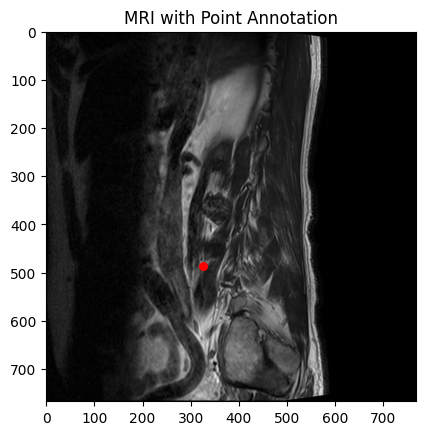

In [153]:
import pydicom
import matplotlib.pyplot as plt

# Example of loading a DICOM image
image_path = 'data/train_images/1028909382/1477339972/24.dcm'
dicom_image = pydicom.dcmread(image_path)
image_array = dicom_image.pixel_array

# Sample coordinates
x, y = 324.887984, 485.865580

plt.imshow(image_array, cmap="gray")
plt.scatter(x, y, color='red', s=30)  # s controls marker size
plt.title("MRI with Point Annotation")
plt.show()

In [ ]:
def image_variance(image_path):
    dicom_image = pydicom.dcmread(image_path)
    image = dicom_image.pixel_array.astype(float)
    return image.var()  # Calculate variance as a proxy for clarity

# Calculate variance for each Sagittal T2 image and filter
sagittal_images['variance'] = sagittal_images['image_path'].apply(image_variance)
best_sagittal_images = sagittal_images.sort_values(by='variance', ascending=False).head(5)  # Top 5 images

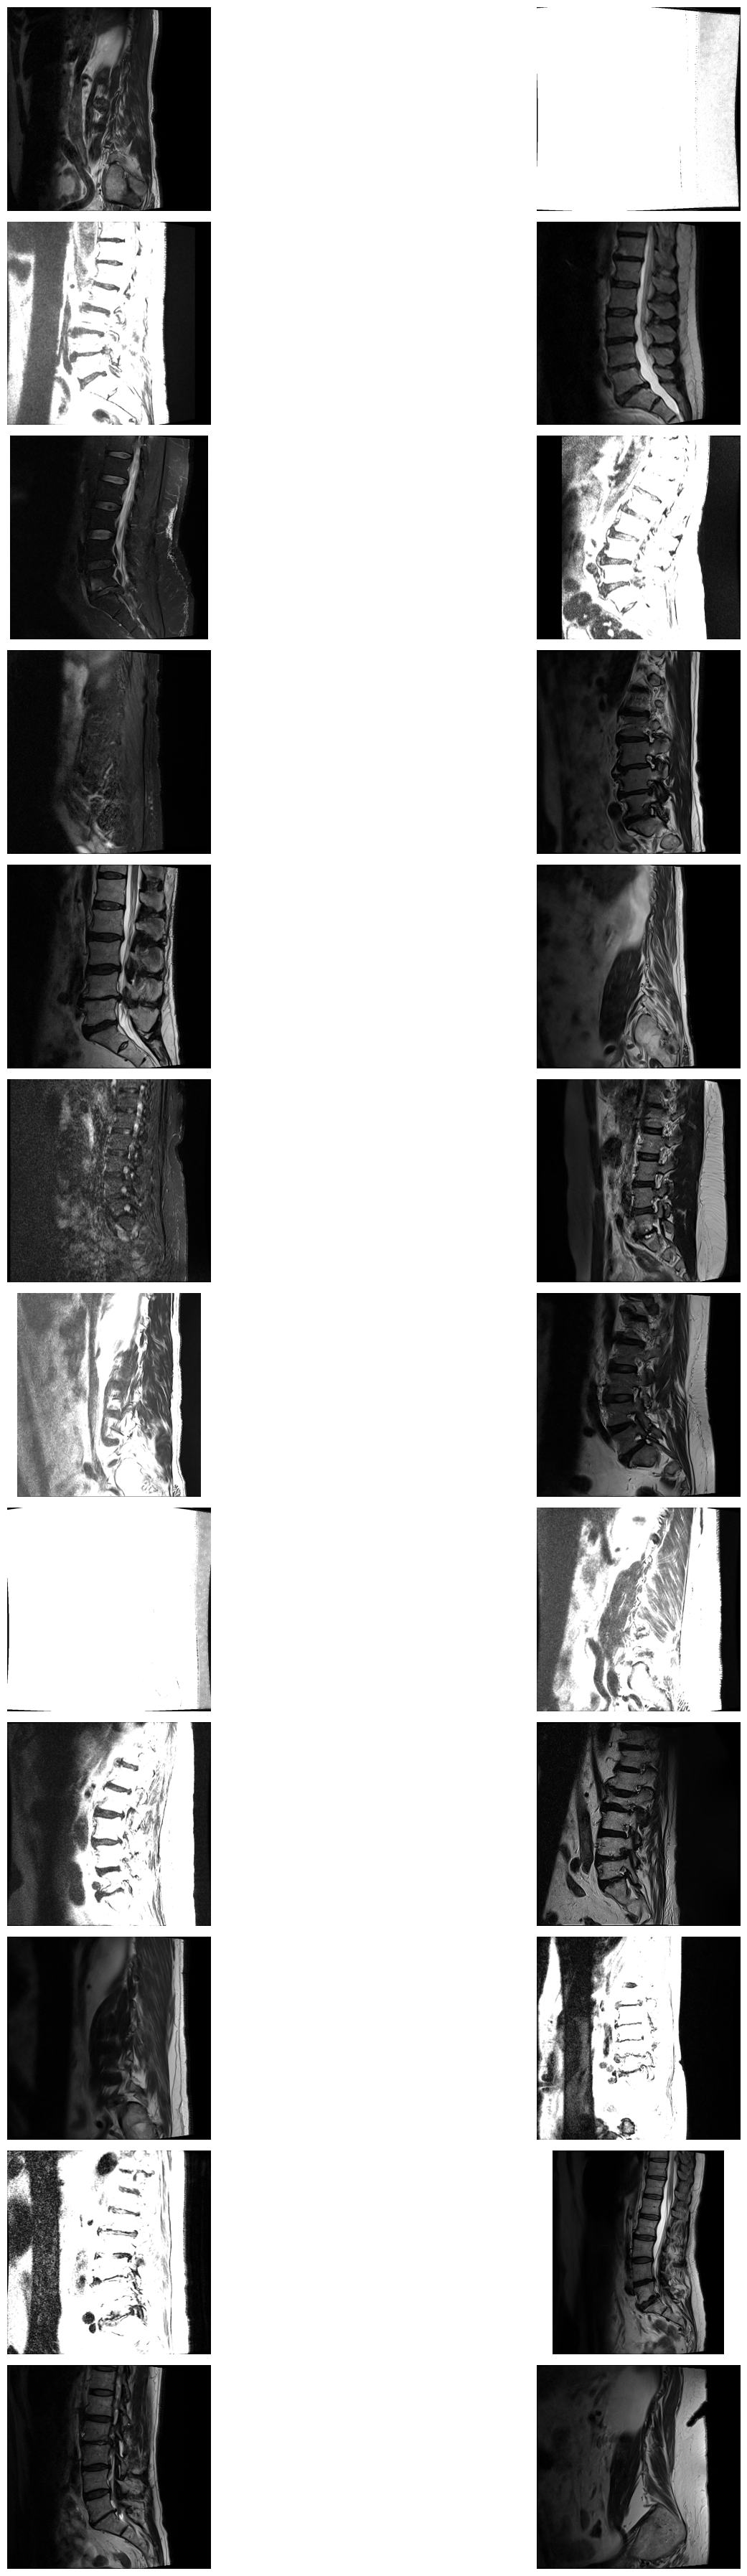

In [154]:
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
from PIL import Image

def display_images_in_grid(df, images_per_row=3, rows=1):
    # Calculate the total number of images to display
    total_images = images_per_row * rows
    
    # Filter for the specified range of images
    image_paths = df['image_path'].dropna().iloc[:total_images]

    # Initialize the figure
    fig, axes = plt.subplots(rows, images_per_row, figsize=(20, rows * 3))
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    for i, image_path in enumerate(image_paths):
        # Load the DICOM image using SimpleITK
        image = sitk.ReadImage(image_path)
        image_array = sitk.GetArrayFromImage(image)  # Convert to NumPy array
        image_array = np.squeeze(image_array)  # Remove single-dimensional entries

        # Convert NumPy array to PIL Image
        pil_image = Image.fromarray(image_array)
        
        # Display the image
        axes[i].imshow(pil_image, cmap='gray')
        axes[i].axis('off')
    
    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage:
display_images_in_grid(df_random_3, images_per_row=2, rows=12)


In [155]:
df_random_3.head(10)

study_id  severity                        condition  level   
8082   1028909382       3.0  left neural foraminal narrowing  l5/s1  \
12489  1618233546       3.0  left neural foraminal narrowing  l5/s1   
5364    692840069       3.0  left neural foraminal narrowing  l5/s1   
4703    624472591       3.0  left neural foraminal narrowing  l5/s1   
11213  1449902148       3.0  left neural foraminal narrowing  l5/s1   
13179  1706437011       3.0  left neural foraminal narrowing  l5/s1   
9563   1246626043       3.0  left neural foraminal narrowing  l5/s1   
3946    497870715       3.0  left neural foraminal narrowing  l5/s1   
10635  1378385941       3.0  left neural foraminal narrowing  l5/s1   
6034    789748240       3.0  left neural foraminal narrowing  l5/s1   

          series_id           x           y   
8082   8.190511e+07  324.887984  485.865580  \
12489  3.577432e+09  163.095723  249.613035   
5364   1.297481e+08  230.571019  372.063128   
4703   3.620277e+09  160.583736  246.312399   
11213  3.855283e+09  261.247853  338.247936   
13179  1.814641e+09  225.904486  357.881331   
9563   6.775853e+08  247.841758  335.859341   
3946   2.901153e+09  177.719928  244.138241   
10635  2.729245e+09  271.380855  391.038697   
6034   4.042339e+09  163.108828  231.841705   

                                           image_path  
8082   data/train_images/1028909382/1477339972/24.dcm  
12489   data/train_images/1618233546/2816981416/1.dcm  
5364    data/train_images/692840069/1130031773/13.dcm  
4703     data/train_images/624472591/2757854807/7.dcm  
11213   data/train_images/1449902148/3975587764/8.dcm  
13179   data/train_images/1706437011/191908310/10.dcm  
9563      data/train_images/1246626043/27170521/2.dcm  
3946     data/train_images/497870715/407097711/14.dcm  
10635  data/train_images/1378385941/2349024780/11.dcm  
6034     data/train_images/789748240/1733417008/1.dcm

### Setting a model resnet50

### one person only for checking

In [156]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
from torchvision import transforms
import pydicom
import cv2
import pandas as pd

class MRIDataset(Dataset):
    def __init__(self, data, transform=None, mode='classification', box_size=50):
        self.data = data
        self.transform = transform
        self.mode = mode
        self.box_size = box_size

    def create_bounding_box(self, x, y, img_shape):
        x_min = max(0, int(x - self.box_size / 2))
        y_min = max(0, int(y - self.box_size / 2))
        x_max = min(img_shape[1], int(x + self.box_size / 2))
        y_max = min(img_shape[0], int(y + self.box_size / 2))
        return x_min, y_min, x_max, y_max

    def __getitem__(self, index):
        row = self.data.iloc[index]
        image_path = row['image_path']
        x, y = row['x'], row['y']
        label = row['condition'] if self.mode == 'classification' else (x, y)

        dicom_image = pydicom.dcmread(image_path)
        image = dicom_image.pixel_array.astype(float)
        image = (image / image.max() * 255).astype('uint8')  # Normalize

        if self.mode == 'localization':
            x_min, y_min, x_max, y_max = self.create_bounding_box(x, y, image.shape)
            roi = image[y_min:y_max, x_min:x_max]
            roi = cv2.resize(roi, (224, 224))
            image_tensor = self.transform(roi) if self.transform else roi
        else:
            annotated_image = image.copy()
            cv2.circle(annotated_image, (int(x), int(y)), 10, (255, 0, 0), -1)
            annotated_image = cv2.resize(annotated_image, (224, 224))
            image_tensor = self.transform(annotated_image) if self.transform else annotated_image

        # Convert grayscale (1 channel) to RGB (3 channels)
        if image_tensor.ndim == 2:
            image_tensor = torch.from_numpy(image_tensor).unsqueeze(0)  # Add channel dimension
        image_tensor = image_tensor.repeat(3, 1, 1)  # Duplicate to 3 channels

        return image_tensor, label

    def __len__(self):
        return len(self.data)



In [157]:
# Transformations for the images
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])
])

# Sample Data for one person  
data = pd.DataFrame({
    'image_path': ['data/train_images/1028909382/1477339972/24.dcm'],
    'x': [324.88], 'y': [485.87], 'condition': [1]    # since als persons belong to persons with df_random_3
})
dataset = MRIDataset(data=data, transform=transform, mode='classification')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Load ResNet-50 and Set Mode
mode = 'classification'  # my goal is to classify the images
num_classes = 3   # 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = models.resnet50(pretrained=True)
if mode == 'classification':
    model.fc = nn.Linear(model.fc.in_features, num_classes)
else:
    model.fc = nn.Linear(model.fc.in_features, 4)

model.to(device)


criterion = nn.CrossEntropyLoss() if mode == 'classification' else nn.SmoothL1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

for epoch in range(num_epochs):
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        
        if mode == 'classification':
            loss = criterion(outputs, labels)
        else:
            loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

c:\Users\HP1\Desktop\Spiced\capstone-project\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HP1\Desktop\Spiced\capstone-project\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Loss: 1.1620
Epoch [2/10], Loss: 0.2198
Epoch [3/10], Loss: 0.0193
Epoch [4/10], Loss: 0.0033
Epoch [5/10], Loss: 0.0008
Epoch [6/10], Loss: 0.0003
Epoch [7/10], Loss: 0.0001
Epoch [8/10], Loss: 0.0001
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0000


###  Plot for images for different samples

Step 1: Define the Custom Dataset Class

    Create Bounding Boxes or Markers: Annotate the images with bounding boxes or markers around the coordinates during preprocessing.
    Transform the Images: Ensure that images are resized to fit the ResNet-50 input size (224x224).
    Return Annotations: If you plan to use the data for localization, return the bounding box coordinates as labels.

In [158]:

import torch
from torch.utils.data import Dataset, DataLoader
import cv2
%pip install torchvision
from torchvision import transforms

class MRIDataset(Dataset):
    def __init__(self, data, transform=None, mode='classification', box_size=50):
        """
        data: A DataFrame or list containing image paths, coordinates (x, y), and labels.
        transform: Transformations to apply to the image.
        mode: 'classification' or 'localization'
        box_size: Size of bounding box around the (x, y) coordinates.
        """
        self.data = data
        self.transform = transform
        self.mode = mode
        self.box_size = box_size

    def create_bounding_box(self, x, y, img_shape):
        x_min = max(0, int(x - self.box_size / 2))
        y_min = max(0, int(y - self.box_size / 2))
        x_max = min(img_shape[1], int(x + self.box_size / 2))
        y_max = min(img_shape[0], int(y + self.box_size / 2))
        return x_min, y_min, x_max, y_max

    def __getitem__(self, index):
        # Get image path, coordinates, and labels
        row = self.data.iloc[index]
        image_path = row['image_path']
        x, y = row['x'], row['y']
        label = row['condition'] if self.mode == 'classification' else (x, y)

        # Load DICOM image and convert to a grayscale numpy array
        dicom_image = pydicom.dcmread(image_path)
        image = dicom_image.pixel_array

        # Create bounding box around (x, y) coordinates
        if self.mode == 'localization':
            x_min, y_min, x_max, y_max = self.create_bounding_box(x, y, image.shape)
            roi = image[y_min:y_max, x_min:x_max]
            roi = cv2.resize(roi, (224, 224))  # Resize ROI to model input size
        else:
            # Annotate the image for classification
            annotated_image = image.copy()
            cv2.circle(annotated_image, (int(x), int(y)), 10, (255, 0, 0), -1)
            annotated_image = cv2.resize(annotated_image, (224, 224))

        # Convert image to PIL format and apply transformations
        if self.transform:
            if self.mode == 'localization':
                image_tensor = self.transform(roi)
            else:
                image_tensor = self.transform(annotated_image)

        return image_tensor, label

    def __len__(self):
        return len(self.data)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Step 2: Define Transformations and Instantiate the DataLoader

We’ll use standard transformations for ResNet-50, including resizing and normalization. Here’s how to set up the data loader:

In [159]:
from torchvision import transforms

# Define transformations for ResNet-50
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])  # Assuming grayscale images
])

# Assuming `data` is a DataFrame containing columns ['image_path', 'x', 'y', 'condition']
dataset = MRIDataset(data=df_random_3, transform=transform, mode='classification')  # or 'localization'
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

Step 3: Set Up ResNet-50 for Classification or Localization

    Classification: Use ResNet-50’s default architecture with the final layer modified to output the number of classes.

In [160]:
import torchvision.models as models
import torch.nn as nn

# Load ResNet-50 and modify the final layer
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1)  # Set to number of conditions since i have got only one damage

In [161]:
# Localization: Modify final layer to output 4 coordinates (x_min, y_min, x_max, y_max)
model.fc = nn.Linear(model.fc.in_features, 4)  # Output bounding box coordinates


Step 4: Training the Model

Finally, set up the training loop to handle either classification or localization. For classification, use CrossEntropyLoss. For localization, you can use SmoothL1Loss for bounding box prediction.

In [162]:
image_array = (image_array / image_array.max() * 255).astype(np.uint8)
image_array = image_array.astype(np.float32) / image_array.max()

In [163]:
import torch.optim as optim

num_epochs = 6 # Define the number of epochs

criterion = nn.CrossEntropyLoss() if mode == 'classification' else nn.SmoothL1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

TypeError: Input type uint16 is not supported

In [ ]:
s

In [ ]:
s

In [ ]:
# Sample coordinates
x, y = 324.887984, 485.865580

plt.imshow(image_array, cmap="gray")
plt.scatter(x, y, color='red', s=30)  # s controls marker size
plt.title("MRI with Point Annotation")
plt.show()